In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(20,15)
#%matplotlib inline


In [4]:
df=pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df.shape

(756, 18)

In [6]:
df.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [7]:
df.season.nunique()

12

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [10]:
df.iloc[df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [11]:
df['win_by_runs'].idxmax()

43

In [12]:
df.iloc[df['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [13]:
df[df[df['win_by_runs'].ge(1)].win_by_runs.min()==df['win_by_runs']]['winner']

58                  Mumbai Indians
105                Kings XI Punjab
163                Kings XI Punjab
344               Delhi Daredevils
350                 Mumbai Indians
518            Chennai Super Kings
598                  Gujarat Lions
614    Royal Challengers Bangalore
734    Royal Challengers Bangalore
755                 Mumbai Indians
Name: winner, dtype: object

In [14]:
df[df[df['win_by_wickets'].ge(1)].win_by_wickets.min()==df['win_by_wickets']]['winner']

559    Kolkata Knight Riders
636      Chennai Super Kings
642      Sunrisers Hyderabad
Name: winner, dtype: object

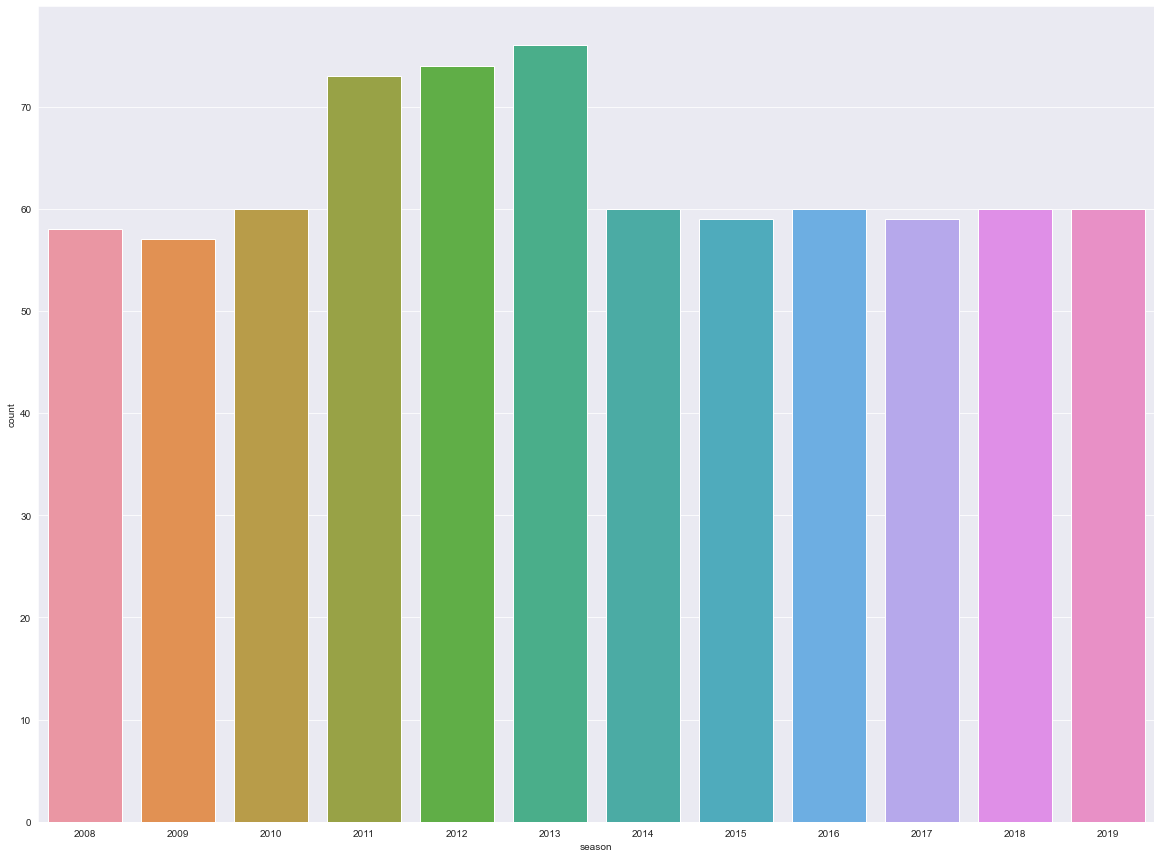

In [15]:
sns.countplot(x='season',data=df)
plt.show()

In [16]:
df.team1.nunique()

15

we need to replace delhi Dardevils to Delhi Capitals

In [17]:
df.replace(['Delhi Daredevils'],'Delhi Capitals',inplace=True)

In [18]:
df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

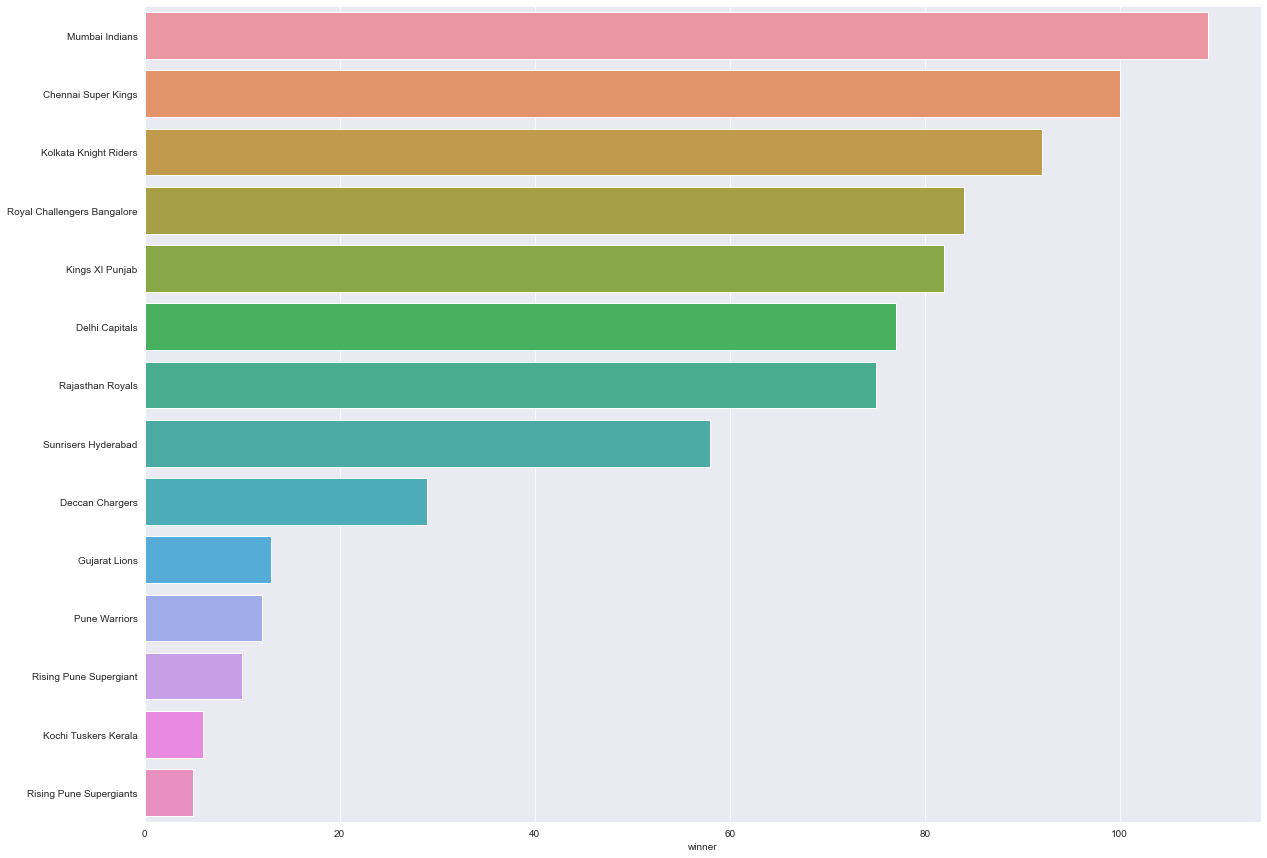

In [19]:
data=df.winner.value_counts()
sns.barplot(y=data.index,x=data,orient='h')

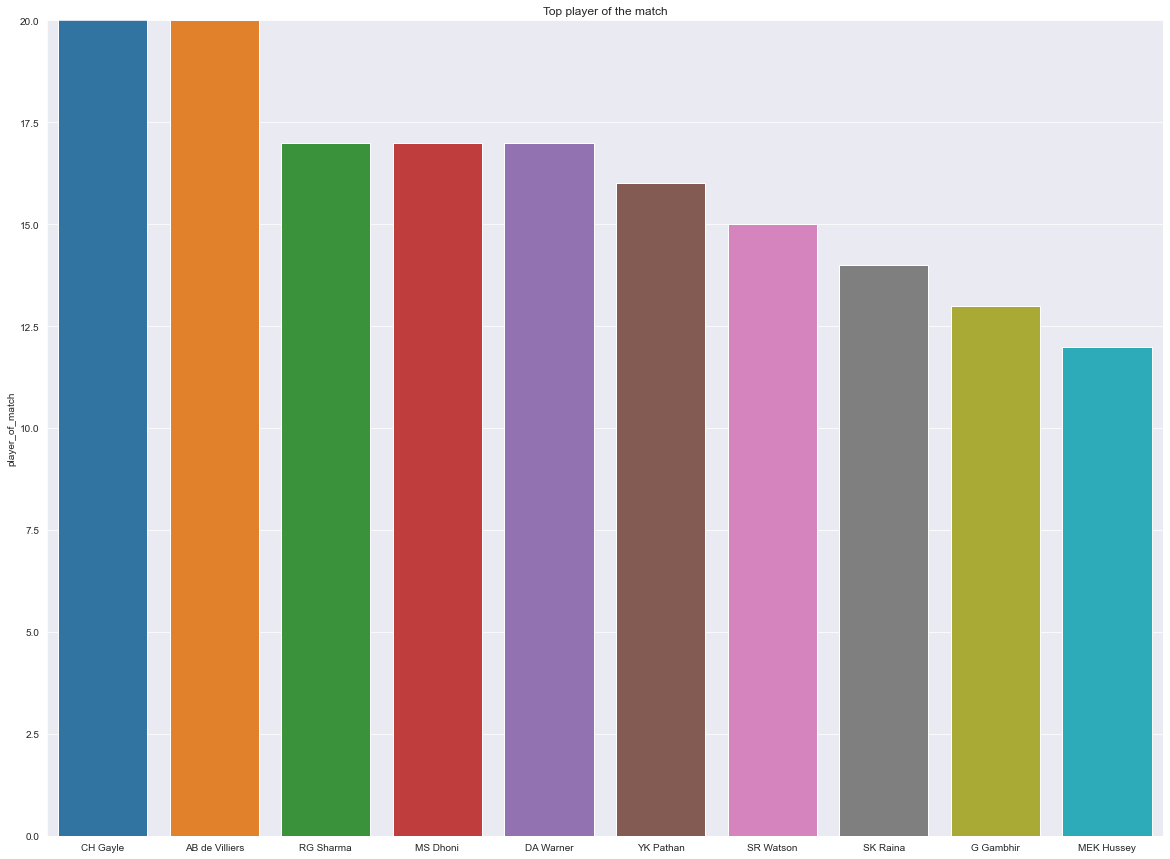

In [20]:
top_player=df.player_of_match.value_counts()[:10]
fig,ax=plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel('Count')
ax.set_title('Top player of the match')
sns.barplot(x=top_player.index,y=top_player,orient='v')
plt.show()

Lets see the effect of winning toss

In [33]:
toss_match_win=df['toss_winner']==df['winner']
toss_match_win.value_counts()

True     393
False    363
dtype: int64

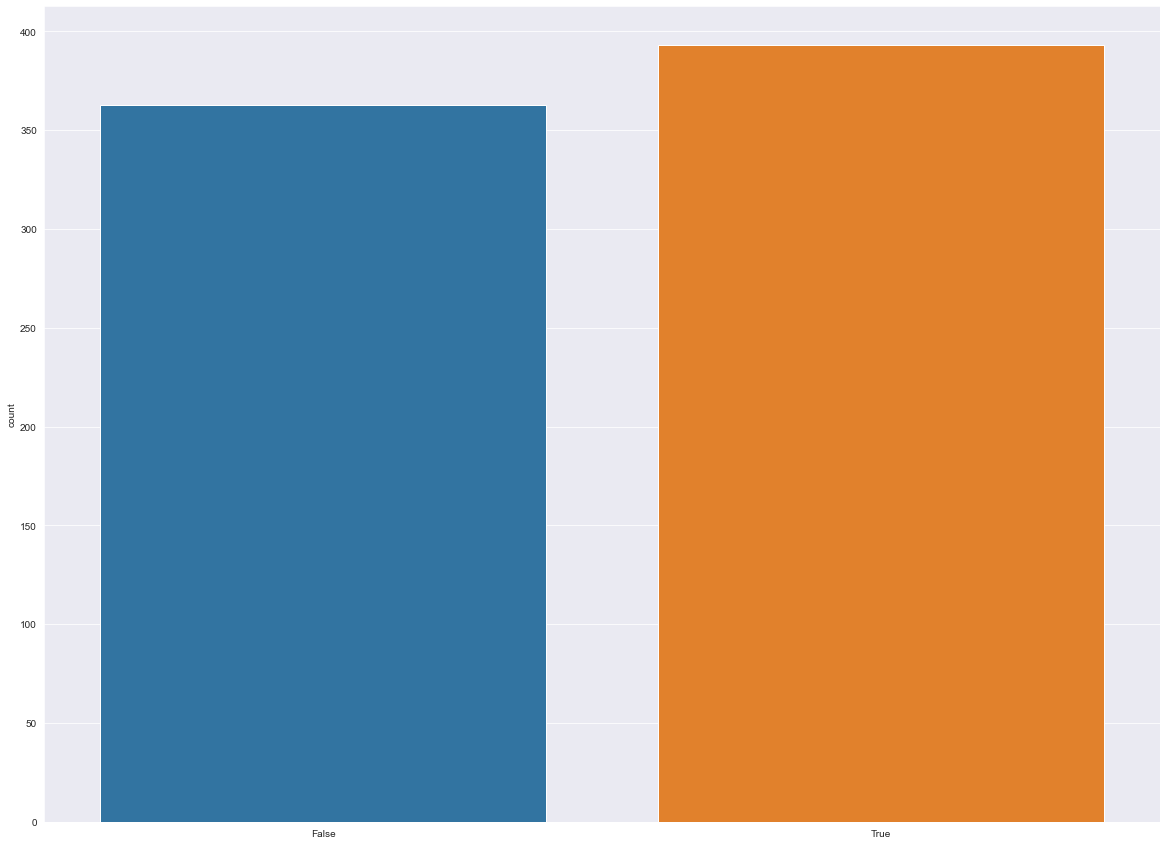

In [34]:
sns.countplot(toss_match_win)

In [43]:
df[df['win_by_runs']>0].groupby('winner')['win_by_runs'].apply(np.mean).sort_values(ascending=False)

winner
Royal Challengers Bangalore    35.771429
Chennai Super Kings            34.192308
Rajasthan Royals               33.148148
Mumbai Indians                 32.736842
Kolkata Knight Riders          30.166667
Delhi Capitals                 27.392857
Rising Pune Supergiants        26.500000
Rising Pune Supergiant         24.600000
Kings XI Punjab                24.342105
Sunrisers Hyderabad            23.766667
Deccan Chargers                23.388889
Pune Warriors                  23.166667
Kochi Tuskers Kerala           11.500000
Gujarat Lions                   1.000000
Name: win_by_runs, dtype: float64

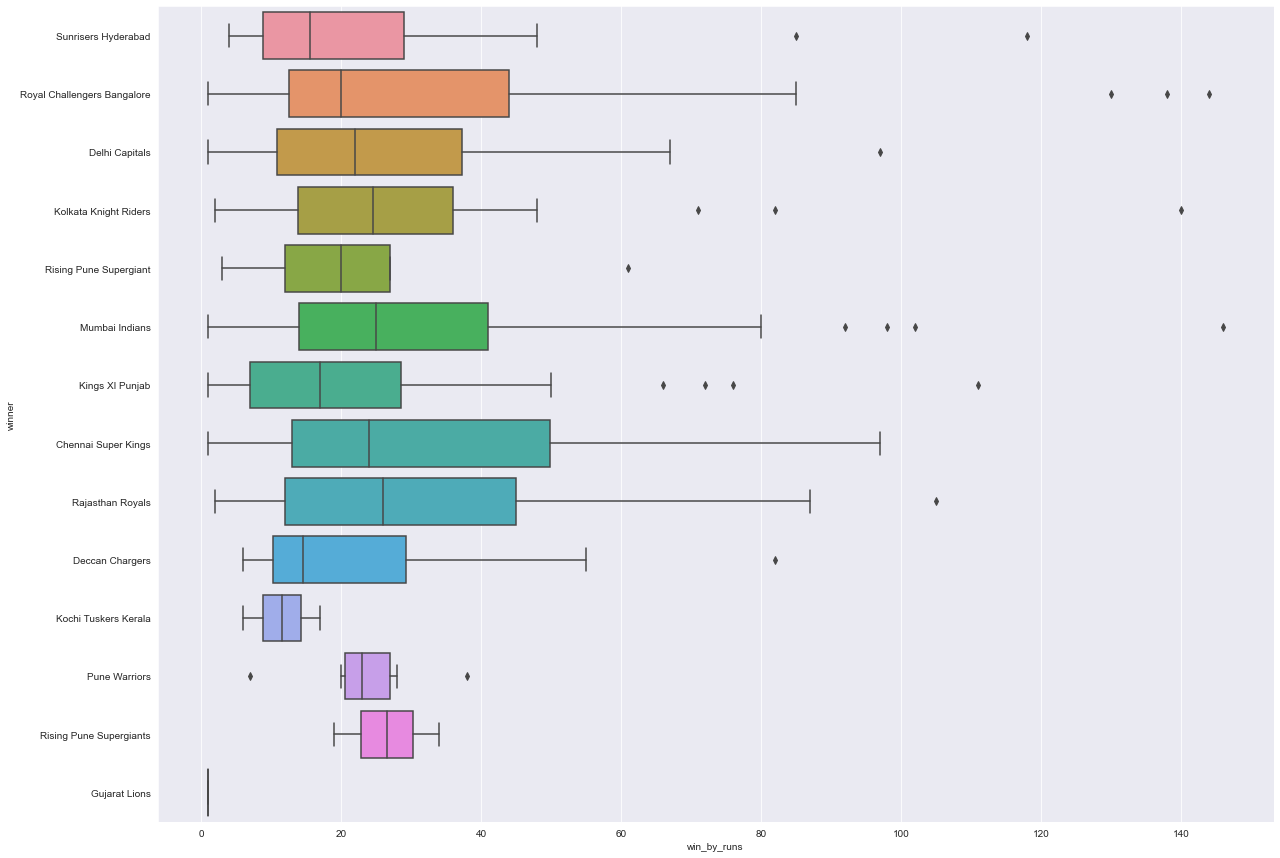

In [54]:
ax.set_title('winning_by_runs')
sns.boxplot(y='winner',x='win_by_runs',data=df[df['win_by_runs']>0],orient='h')

In [55]:
df[df['win_by_wickets']>0].groupby('winner')['win_by_wickets'].apply(np.mean).sort_values(ascending=False)

winner
Kochi Tuskers Kerala           7.500000
Rising Pune Supergiants        6.666667
Deccan Chargers                6.545455
Royal Challengers Bangalore    6.541667
Sunrisers Hyderabad            6.407407
Kings XI Punjab                6.380952
Delhi Capitals                 6.333333
Kolkata Knight Riders          6.267857
Rising Pune Supergiant         6.200000
Mumbai Indians                 6.140000
Chennai Super Kings            6.020833
Pune Warriors                  6.000000
Rajasthan Royals               5.934783
Gujarat Lions                  5.416667
Name: win_by_wickets, dtype: float64

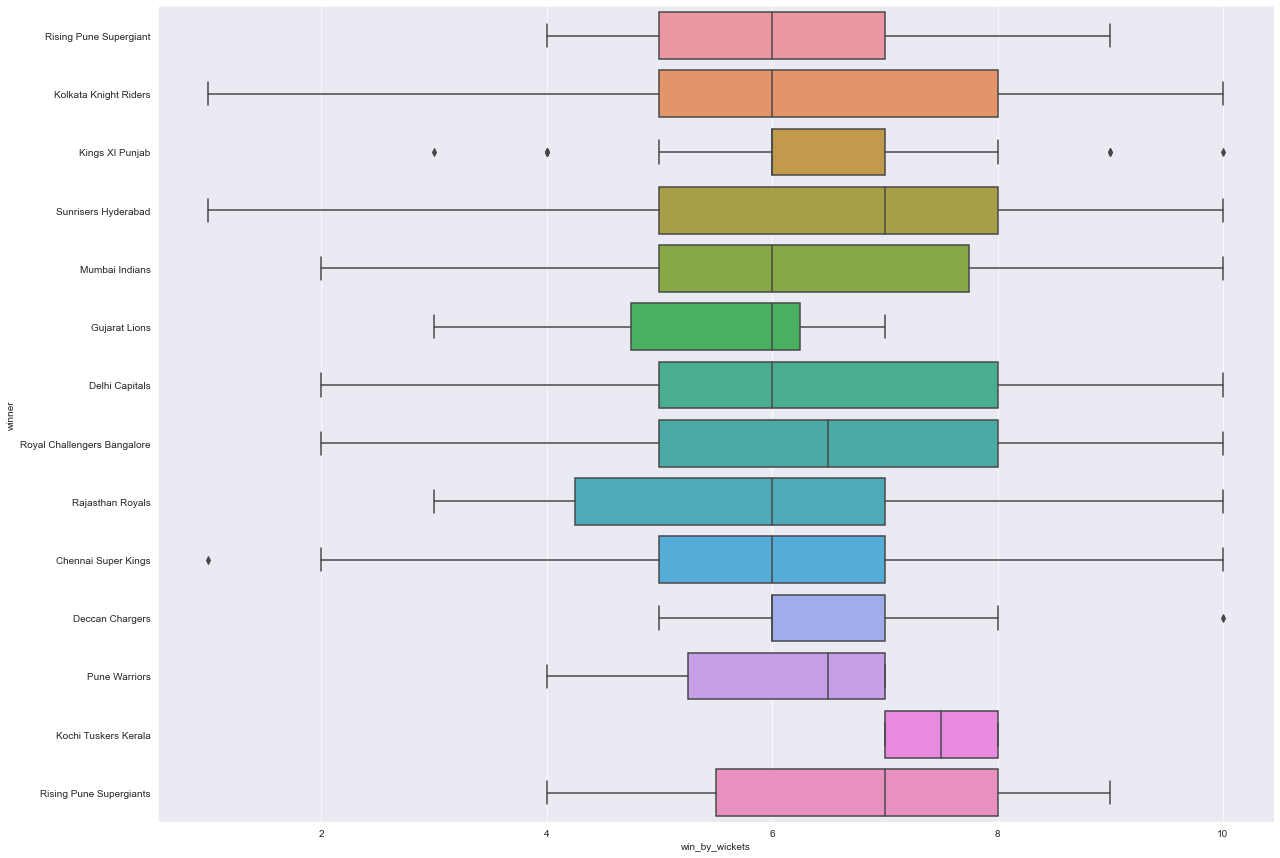

In [56]:
ax.set_title('winning_by_wickets')
sns.boxplot(y='winner',x='win_by_wickets',data=df[df['win_by_wickets']>0],orient='h')